# Car Price Prediction
[Dataset on kaggle](https://www.kaggle.com/datasets/sidharth178/car-prices-dataset)

## Contents
* Data cleaning
* Data understanding and EDA
* Data preprocessing
* Modeling
* Evaluation


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set(font_scale=1.4)

In [39]:
data = pd.read_csv('data.csv')

In [16]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [15]:
data.shape

(19237, 18)

In [17]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

## Data Cleaning

Removing unnecessary columns

In [40]:
data.drop(['ID', 'Levy'], axis=1, inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  object 
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memo

There are 3 categorical columns which need to be converted to float

In [21]:
import re

In [50]:
def extract_numbers(text):
    regex = "[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?"
    numbers_list = re.findall(regex, text)
    return float(numbers_list[0])

In [52]:
data['Engine volume'] = data['Engine volume'].apply(extract_numbers)

In [54]:
data['Mileage'] = data['Mileage'].apply(extract_numbers)

In [56]:
data['Doors'] = data['Doors'].apply(extract_numbers)

In [57]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4.0,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4.0,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4.0,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4.0,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4.0,Left wheel,Silver,4


Detecting duplicates and missing values

In [59]:
data.isna().sum()

Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [60]:
data.duplicated().sum()

3512

In [61]:
data = data.drop_duplicates(keep='first')

In [63]:
data.shape

(15725, 16)

---
## Data Understanding and EDA

In [64]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4.0,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4.0,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4.0,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4.0,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4.0,Left wheel,Silver,4


In [65]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,15725.0,2.027944e+04,2.106390e+05,1.0,7527.0,14166.0,23364.0,2.630750e+07
Prod. year,15725.0,2.010519e+03,6.012122e+00,1939.0,2008.0,2012.0,2014.0,2.020000e+03
Engine volume,15725.0,2.212820e+00,8.061869e-01,0.0,1.7,2.0,2.5,2.000000e+01
Mileage,15725.0,1.836421e+06,5.353248e+07,0.0,66575.0,121000.0,180000.0,2.147484e+09
Cylinders,15725.0,4.483561e+00,1.134466e+00,1.0,4.0,4.0,4.0,1.600000e+01
Doors,15725.0,3.913005e+00,4.359942e-01,2.0,4.0,4.0,4.0,5.000000e+00
Airbags,15725.0,6.543339e+00,4.067728e+00,0.0,4.0,6.0,12.0,1.600000e+01


In [67]:
data.columns

Index(['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [92]:
def bar_show(column, title):
    plt.figure(figsize=(14, 7))
    sns.countplot(y=data[column], order=data[column].value_counts().index)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14)
    plt.show()

In [89]:
def pie_show(column, title):
    plt.figure(figsize=(10, 5))
    plt.pie(data[column].value_counts(), labels=data[column].unique(), autopct="%0.2f")
    plt.title(title)
    plt.show()

### Cars made up of leather?

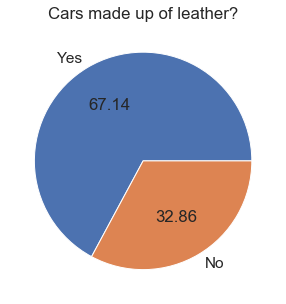

In [90]:
pie_show('Leather interior', 'Cars made up of leather?')

### Most common colors in the list

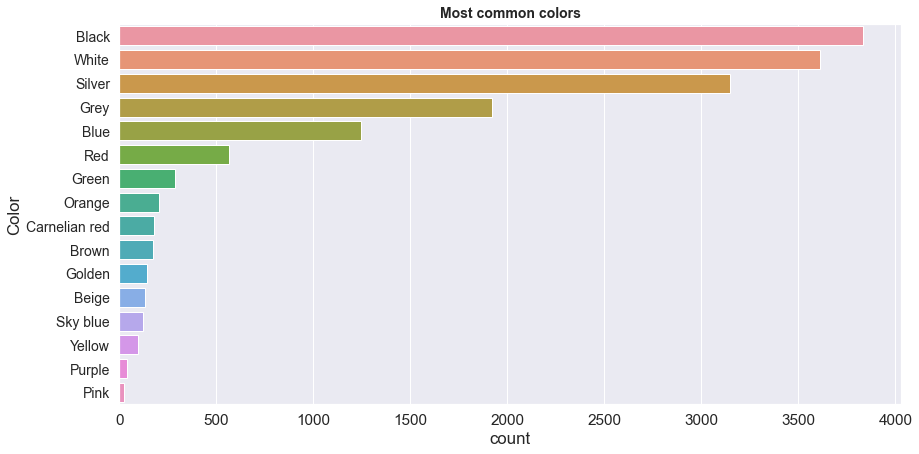

In [93]:
bar_show('Color', 'Most common colors')

### Most common tires on the list

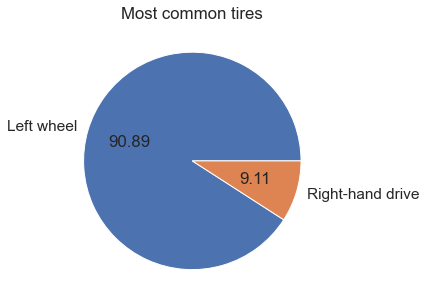

In [95]:
pie_show('Wheel', 'Most common tires')

### Most common gears on the list


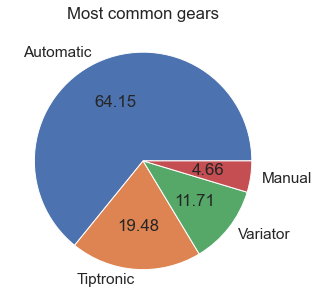

In [96]:
pie_show('Gear box type', 'Most common gears')

### Most common fuel in the list


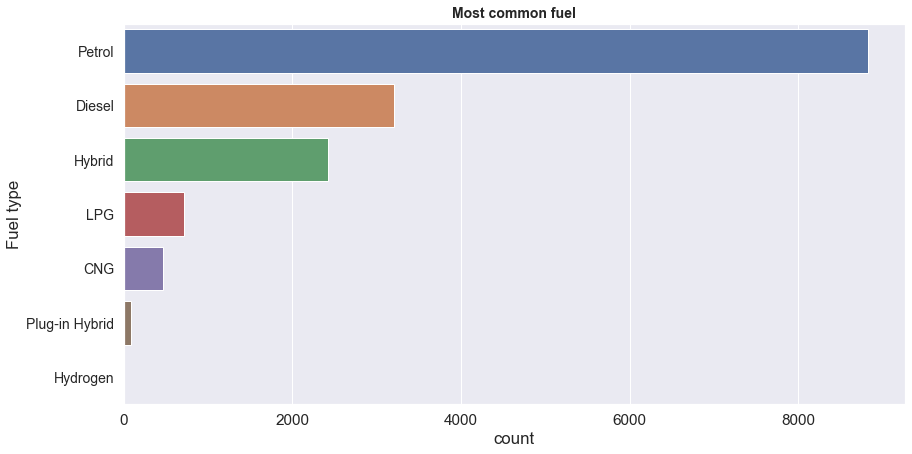

In [97]:
bar_show('Fuel type', 'Most common fuel')

### Most common category in the list


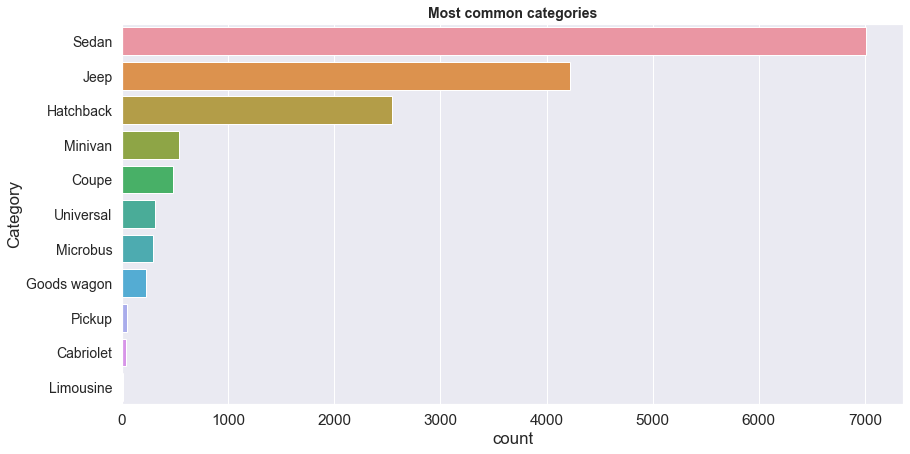

In [98]:
bar_show('Category', 'Most common categories')

### Most common models in the list


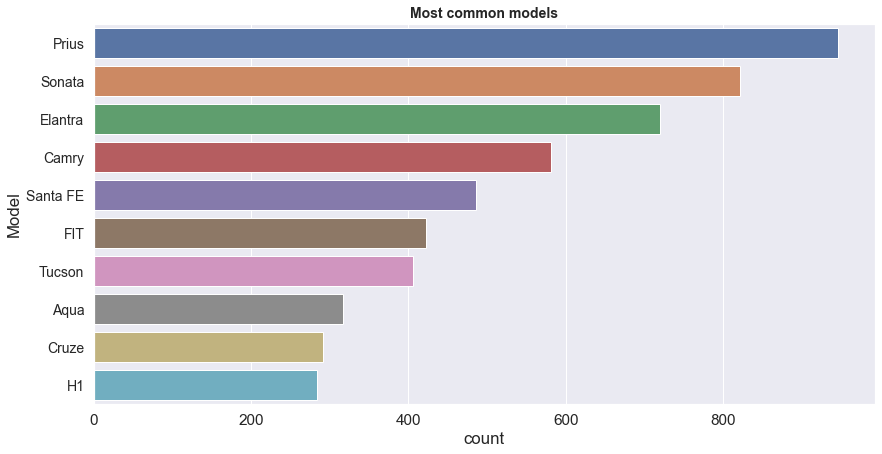

In [100]:
plt.figure(figsize=(14, 7))
sns.countplot(y=data['Model'], order=data['Model'].value_counts().index[0:10])
plt.title('Most common models', fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)
plt.show()

### Most common manufacturer in the list


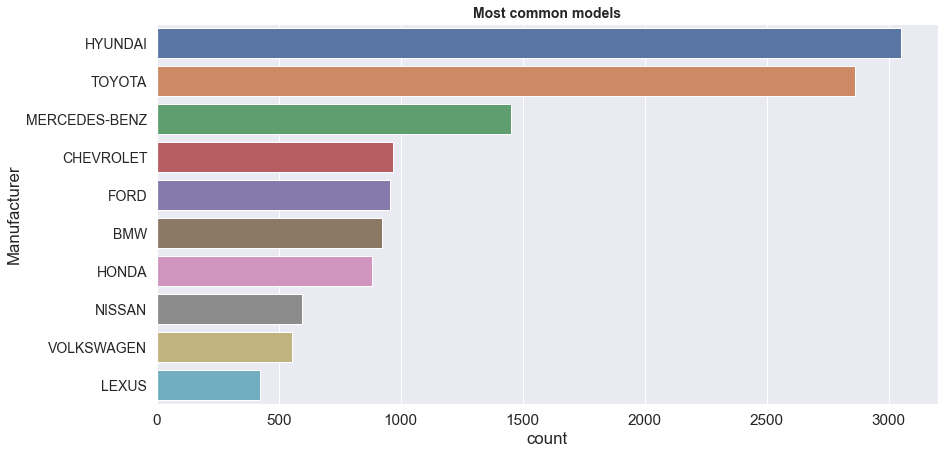

In [102]:
plt.figure(figsize=(14, 7))
sns.countplot(y=data['Manufacturer'], order=data['Manufacturer'].value_counts().index[0:10])
plt.title('Most common models', fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)
plt.show()

### Price by manufacturer

D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


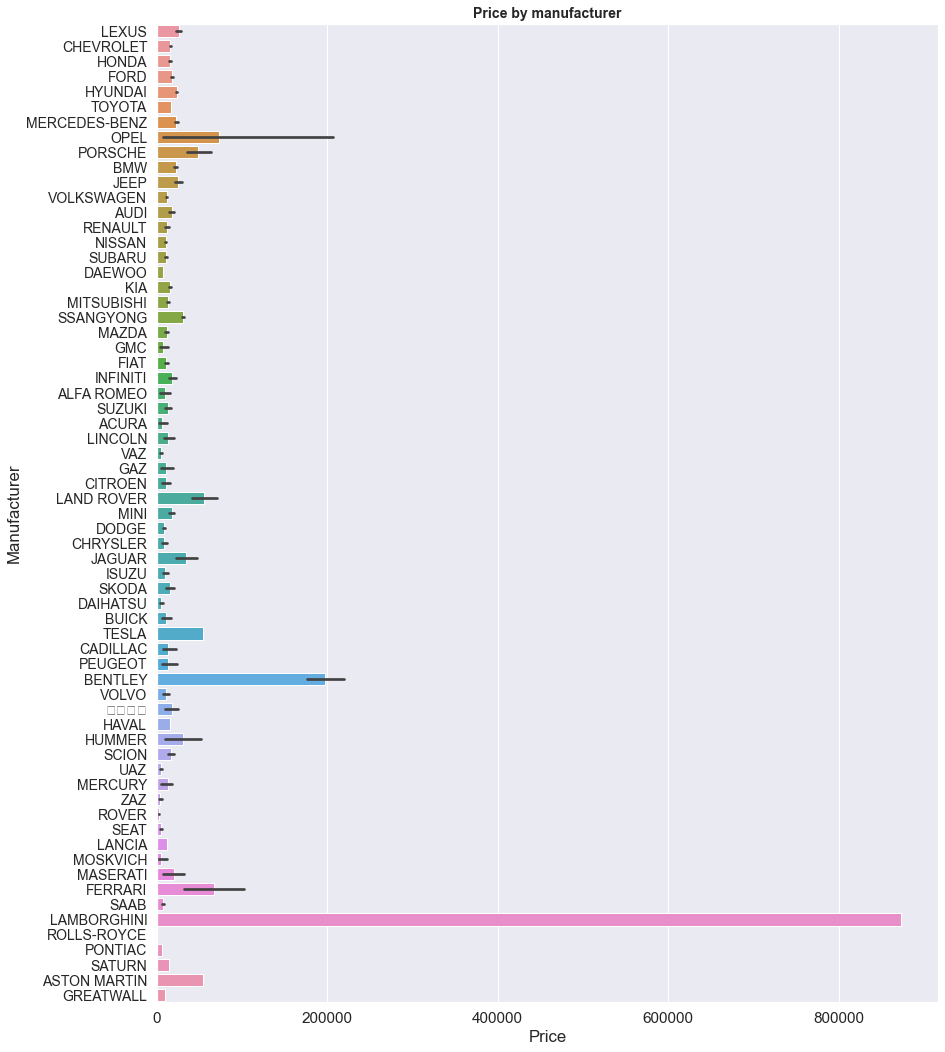

In [103]:
plt.figure(figsize=(14, 18))
sns.barplot(y=data['Manufacturer'], x=data['Price'])
plt.title('Price by manufacturer', fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)
plt.show()

### Prices in year

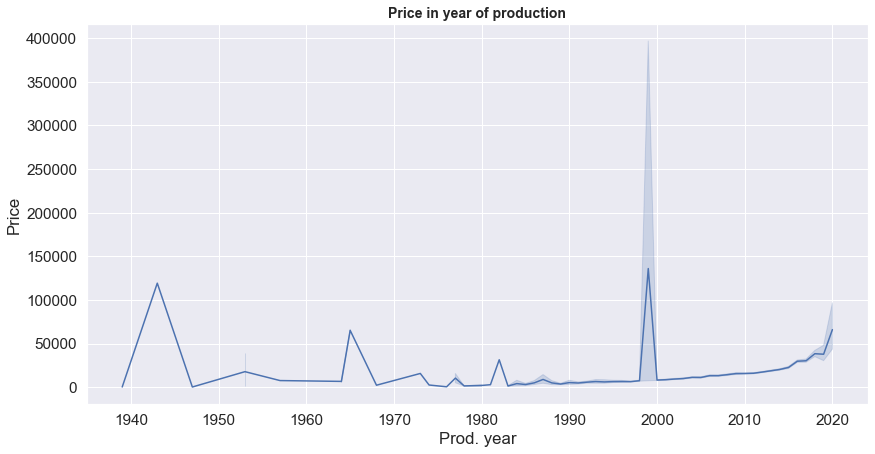

In [105]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['Prod. year'], y=data['Price'])
plt.title('Price in year of production', fontsize=14, fontweight='bold')
plt.show()

### Year of manufacturer

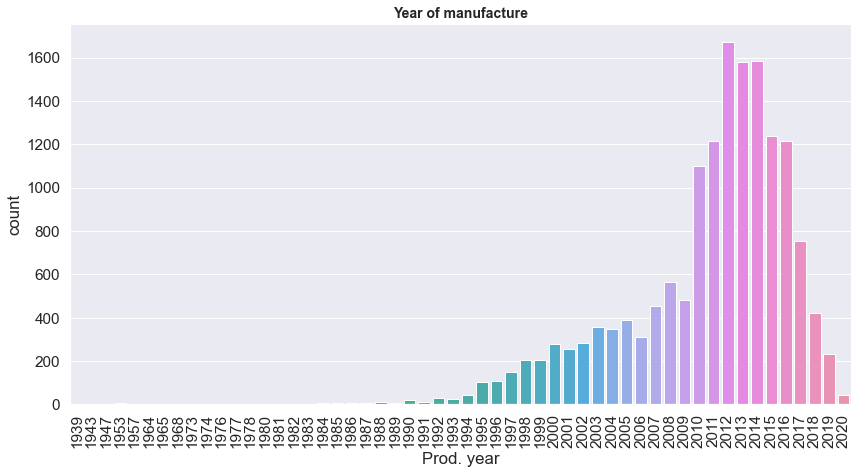

In [106]:
plt.figure(figsize=(14, 7))
sns.countplot(x=data['Prod. year'])
plt.title('Year of manufacture', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

### Drive wheels 

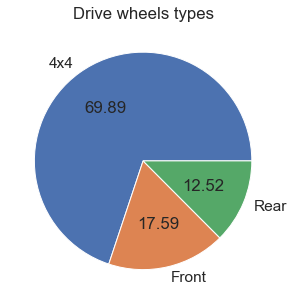

In [109]:
pie_show('Drive wheels', 'Drive wheels types')

### Number of doors

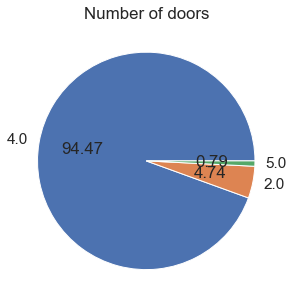

In [111]:
pie_show('Doors', 'Number of doors')

---
## Data Preprocessing
* Feature scaling
* Target normalization

In [176]:
data.columns

Index(['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Name'],
      dtype='object')

Creating name column

In [121]:
data['Name'] = data['Manufacturer'] + ' ' + data['Category'] + ' ' + data['Model']

In [123]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Name
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4.0,Left wheel,Silver,12,LEXUS Jeep RX 450
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4.0,Left wheel,Black,8,CHEVROLET Jeep Equinox
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4.0,Right-hand drive,Black,2,HONDA Hatchback FIT
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4.0,Left wheel,White,0,FORD Jeep Escape
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4.0,Left wheel,Silver,4,HONDA Hatchback FIT


Extracting X, y

In [177]:
X = data[['Manufacturer', 'Category', 'Fuel type', 'Leather interior', 'Gear box type', 'Color',
          'Engine volume', 'Doors', 'Airbags', 'Cylinders', 'Prod. year', 'Mileage']]
y = data['Price']

In [178]:
X.shape

(15725, 12)

In [179]:
X.head()

,Manufacturer,Category,Fuel type,Leather interior,Gear box type,Color,Engine volume,Doors,Airbags,Cylinders,Prod. year,Mileage
0,LEXUS,Jeep,Hybrid,Yes,Automatic,Silver,3.5,4.0,12,6.0,2010,186005.0
1,CHEVROLET,Jeep,Petrol,No,Tiptronic,Black,3.0,4.0,8,6.0,2011,192000.0
2,HONDA,Hatchback,Petrol,No,Variator,Black,1.3,4.0,2,4.0,2006,200000.0
3,FORD,Jeep,Hybrid,Yes,Automatic,White,2.5,4.0,0,4.0,2011,168966.0
4,HONDA,Hatchback,Petrol,Yes,Automatic,Silver,1.3,4.0,4,4.0,2014,91901.0


Scaling numerical features

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
ss = StandardScaler()

In [161]:
scaled = ss.fit_transform(X[['Engine volume', 'Doors', 'Airbags', 'Cylinders', 'Prod. year', 'Mileage']])

In [162]:
X[['Engine volume', 'Doors', 'Airbags', 'Cylinders', 'Prod. year', 'Mileage']] = scaled

C:\Users\ACER\AppData\Local\Temp\ipykernel_9432\665133827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Engine volume', 'Doors', 'Airbags', 'Cylinders', 'Prod. year', 'Mileage']] = scaled


In [163]:
X.head()

,Manufacturer,Category,Fuel type,Leather interior,Gear box type,Color,Engine volume,Doors,Airbags,Cylinders,Prod. year,Mileage
0,LEXUS,Jeep,Hybrid,Yes,Automatic,Silver,1.596678,0.199539,1.341495,1.336741,-0.086315,-0.030831
1,CHEVROLET,Jeep,Petrol,No,Tiptronic,Black,0.976454,0.199539,0.358113,1.336741,0.080021,-0.030719
2,HONDA,Hatchback,Petrol,No,Variator,Black,-1.132305,0.199539,-1.116959,-0.426259,-0.751658,-0.030570
3,FORD,Jeep,Hybrid,Yes,Automatic,White,0.356231,0.199539,-1.608649,-0.426259,0.080021,-0.031149
4,HONDA,Hatchback,Petrol,Yes,Automatic,Silver,-1.132305,0.199539,-0.625268,-0.426259,0.579029,-0.032589


Categorical columns indices

In [180]:
cat_index = [0, 1, 2, 3, 4, 5]

Target normalization

In [174]:
y = np.log(y)

---
## Modeling

In [183]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

D:\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [197]:
model = CatBoostRegressor(iterations=100, learning_rate=0.01, depth=14, eval_metric='MAE', verbose=10)

In [198]:
model.fit(X_train, y_train, np.asarray(cat_index), eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12279.7708731	test: 18751.7755036	best: 18751.7755036 (0)	total: 330ms	remaining: 32.7s
10:	learn: 11649.6359862	test: 18158.2057773	best: 18158.2057773 (10)	total: 3.06s	remaining: 24.7s
20:	learn: 11075.2858233	test: 17624.6884825	best: 17624.6884825 (20)	total: 6.32s	remaining: 23.8s
30:	learn: 10558.4021810	test: 17148.8617544	best: 17148.8617544 (30)	total: 9.55s	remaining: 21.3s
40:	learn: 10103.4528043	test: 16734.7710921	best: 16734.7710921 (40)	total: 12.7s	remaining: 18.3s
50:	learn: 9681.5905219	test: 16358.7297350	best: 16358.7297350 (50)	total: 16.2s	remaining: 15.5s
60:	learn: 9311.0111134	test: 16029.2500418	best: 16029.2500418 (60)	total: 19.4s	remaining: 12.4s
70:	learn: 8978.2060082	test: 15737.6005868	best: 15737.6005868 (70)	total: 22.7s	remaining: 9.26s
80:	learn: 8672.1084289	test: 15472.5339844	best: 15472.5339844 (80)	total: 26s	remaining: 6.11s
90:	learn: 8392.0639880	test: 15235.1906191	best: 15235.1906191 (90)	total: 29.6s	remaining: 2.93s
99:	learn